In [ ]:
#John David Conley
#Machine Learning
#Assignment 2
#10-18-2022
#https://github.com/DavidConley/machinelearning02

In [1]:
###1. Numpy
###Using NumPy create random vector of size 15 having only Integers in the range 1-20.
###1. Reshape the array to 3 by 5
###2. Print array shape.
###3. Replace the max in each row by 0
import numpy as np
np.__version__

'1.20.3'

In [117]:
arr = np.random.randint(1, 21, 15)
arr

array([14,  6, 13,  5, 14,  6, 11, 19, 12, 14, 12, 17,  2, 12,  1])

In [118]:
#1
arr2 = arr.reshape((3,5))
arr2

array([[14,  6, 13,  5, 14],
       [ 6, 11, 19, 12, 14],
       [12, 17,  2, 12,  1]])

In [119]:
#2
print(arr2.shape)

(3, 5)


In [120]:
#3
np.where(arr2 == arr2.max(axis = 1)[:,None], 0, arr2)

array([[ 0,  6, 13,  5,  0],
       [ 6, 11,  0, 12, 14],
       [12,  0,  2, 12,  1]])

In [121]:
###2. Pandas
###1. Read the provided CSV file ‘data.csv’.
###https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF?usp=sharing
###2. Show the basic statistical description about the data.
###3. Check if the data has null values.
###a. Replace the null values with the mean
###4. Select at least two columns and aggregate the data using: min, max, count, mean.
###5. Filter the dataframe to select the rows with calories values between 500 and 1000.
###6. Filter the dataframe to select the rows with calories values > 500 and pulse < 100.
###7. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.
###8. Delete the “Maxpulse” column from the main df dataframe
###9. Convert the datatype of Calories column to int datatype.
###10. Using pandas create a scatter plot for the two columns (Duration and Calories).
import pandas as pd
pd.__version__

'1.3.4'

In [122]:
#1
df = pd.read_csv('data.csv')
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [123]:
#2
df.describe(include='all')

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [124]:
#3
df.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [125]:
#3a
df2 = df.fillna(df.replace('',df.mean()))
df2['Calories'] = df2['Calories'].fillna(df2['Calories'].mean())
df2

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [126]:
df2.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [127]:
#4
df2.groupby(['Pulse']).agg({'Duration': ['min']}).reset_index()

,Pulse,Duration
,,min
0,80,15
1,83,20
2,85,30
3,90,30
4,92,30
5,93,30
6,95,20
7,97,45
8,98,60


In [128]:
df2.groupby(['Pulse']).agg({'Duration': ['max']}).reset_index()

,Pulse,Duration
,,max
0,80,30
1,83,20
2,85,30
3,90,180
4,92,60
5,93,90
6,95,45
7,97,150
8,98,90


In [129]:
df2.groupby(['Pulse']).agg({'Duration': ['count']}).reset_index()

,Pulse,Duration
,,count
0,80,2
1,83,1
2,85,1
3,90,12
4,92,3
5,93,3
6,95,3
7,97,7
8,98,6


In [130]:
df2.groupby(['Pulse']).agg({'Duration': ['mean']}).reset_index()

,Pulse,Duration
,,mean
0,80,22.500000
1,83,20.000000
2,85,30.000000
3,90,80.000000
4,92,50.000000
5,93,60.000000
6,95,31.666667
7,97,83.571429
8,98,65.000000


In [131]:
#5
df2[(df2['Calories'] > 500) & (df2['Calories'] < 1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [132]:
#6
df2[(df2['Calories'] > 500) | (df2['Calories'] < 100)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
60,210,108,160,1376.0
61,160,110,137,1034.4
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
69,300,108,143,1500.2
70,150,97,129,1115.0
72,90,100,127,700.0


In [133]:
#7
df_modified = df2.drop('Maxpulse', axis = 1)
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [134]:
#8
df3 = df2.copy()
del df3['Maxpulse']
df3

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [135]:
#9
print(df3.dtypes)

Duration      int64
Pulse         int64
Calories    float64
dtype: object


In [136]:
df3['Calories'] = df3['Calories'].astype(int)
print(df3.dtypes)

Duration    int64
Pulse       int64
Calories    int32
dtype: object


In [137]:
df3

,Duration,Pulse,Calories
0,60,110,409
1,60,117,479
2,60,103,340
3,45,109,282
4,45,117,406
...,...,...,...
164,60,105,290
165,60,110,300
166,60,115,310
167,75,120,320


<AxesSubplot:xlabel='Duration', ylabel='Calories'>

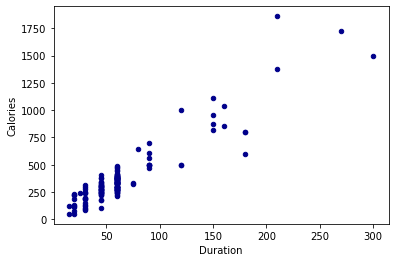

In [138]:
#10
df3.plot.scatter(x='Duration', y='Calories', c='DarkBlue')

In [103]:
###3. Matplotlib
###1. Write a Python programming to create a below chart of the popularity of programming Languages.
###2. Sample data:
###Programming languages: Java, Python, PHP, JavaScript, C#, C++
###Popularity: 22.2, 17.6, 8.8, 8, 7.7, 6.7
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.__version__

'3.4.3'

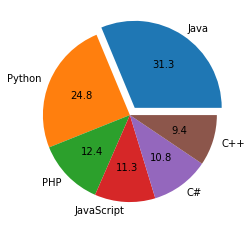

In [139]:
slices = np.array([22.2, 17.6, 8.8, 8, 7.7, 6.7])
dlabels = ["Java", "Python", "PHP", "JavaScript", "C#", "C++"]

plt.pie(slices, labels = dlabels, autopct='%.1f', explode = [0.1, 0, 0, 0, 0, 0])
plt.show()